In [1]:

import numpy as np
import torch
import matplotlib.pyplot as plt
from cebmf_torch import *
def rmse(A,B):
    return np.sqrt(((A-B)**2).mean())



In [2]:

rng = np.random.default_rng(0)
n,p=50,40
u = rng.random(n); v=rng.random(p)
X = np.outer(u,v) + rng.normal(0,0.1,(n,p))

Y = torch.tensor(X, dtype=torch.float32)
m = cEBMF(Y, K=5, prior_L="norm", prior_F="norm")
m.initialize("svd")
base = rmse((m.L@m.F.T).cpu().numpy(), np.outer(u,v))



In [3]:
for _ in range(20):
        m.iter_once()
improved = rmse((m.L@m.F.T).cpu().numpy(), np.outer(u,v))

5
5
Converged after 56 iterations.
5
Converged after 67 iterations.
Converged after 54 iterations.
4
Converged after 55 iterations.
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [4]:
improved <= base + 1e-8

np.True_

In [5]:
base 

np.float64(0.05827887506554921)

In [6]:
improved

np.float64(0.025049325771971845)

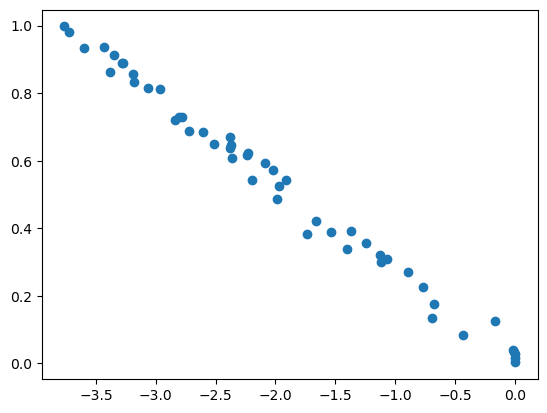

In [7]:
plt.scatter( m.L[:,0],u   )

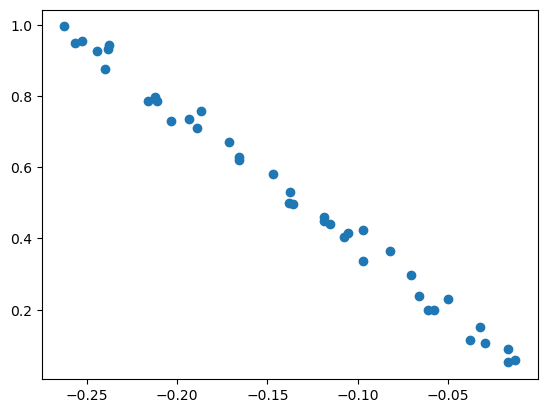

In [8]:
plt.scatter( m.F[:,0],v   )